In [1]:
import numpy as np
import os
import imutils
import dlib
import cv2

import imageio
from imutils import face_utils


import time
import os

In [2]:
people = ['F01','F02','F04','F05','F06','F07','F08','F09','F10','F11','M01','M02','M04','M07','M08']
folder_enum = ['01','02','03','04','05','06','07','08', '09', '10']
instances = ['01','02','03','04','05','06','07','08', '09', '10']
data_types = ['words']
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']

import pickle

from keras.utils import np_utils, generic_utils

# WITH ONE HOT ENCODING 

with open('pickle_train_test_ohe/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('pickle_train_test_ohe/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('pickle_train_test_ohe/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('pickle_train_test_ohe/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('pickle_train_test_ohe/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('pickle_train_test_ohe/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)

# WITHOUT ONE HOT ENCODING 
"""
with open('pickle_train_test/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('pickle_train_test/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('pickle_train_test/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('pickle_train_test/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('pickle_train_test/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('pickle_train_test/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)
"""

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(1200, 22, 100, 100, 1)
(1200, 10)
(150, 22, 100, 100, 1)
(150, 10)
(150, 22, 100, 100, 1)
(150, 10)


In [3]:
X_train[0].shape

(22, 100, 100, 1)

In [4]:
y_train.shape

(1200, 10)

In [5]:
"""from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train_enc = le.transform(y_train)
#y_test_enc = le.transform(y_test)"""

'from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\nle.fit(y_train)\ny_train_enc = le.transform(y_train)\n#y_test_enc = le.transform(y_test)'

In [6]:
from tensorflow.keras.layers import Conv3D, MaxPooling3D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt

from tensorflow import keras


In [7]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [8]:
"""from keras.utils import to_categorical

y_train_1 = to_categorical(y_train,num_classes = 10, dtype ="float32")
"""

'from keras.utils import to_categorical\n\ny_train_1 = to_categorical(y_train,num_classes = 10, dtype ="float32")\n'

In [9]:
#y_train_1.dtype

In [10]:
#CNN + LSTM

model = Sequential()

# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))

model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Reshape((128, 1*10*10)))  

# LSTMS - Recurrent Network Layer
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(.5))

model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 20, 98, 98, 32)    896       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 10, 49, 49, 32)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 8, 47, 47, 64)     55360     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 4, 23, 23, 64)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 2, 21, 21, 128)    221312    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 1, 10, 10, 128)    0         
_________________________________________________________________
reshape (Reshape)            (None, 128, 100)          0

In [11]:
'''import visualkeras
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 28, encoding="unic")'''

'import visualkeras\nfrom PIL import ImageFont\n\nfont = ImageFont.truetype("arial.ttf", 28, encoding="unic")'

In [12]:
#visualkeras.layered_view(model, legend=True, font=font) 

In [13]:
#plot_model(model, to_file='Vis_speech_model_plot.png', show_shapes=True, show_layer_names=True)


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=4)

t1 = time.time()
history = model.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=35)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")


Epoch 1/35
38/38 [==============================] - 975s 26s/step - loss: 2.3174 - accuracy: 0.0620 - val_loss: 2.2953 - val_accuracy: 0.1000
Epoch 2/35


In [ ]:
"""Training and validation accuracy"""

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.xlim(1, 15)
# plt.ylim(0, 3)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



Error: Kernel is dead

In [ ]:
model.save('complete_saved_model_35e')


INFO:tensorflow:Assets written to: complete_saved_model_30e\assets


INFO:tensorflow:Assets written to: complete_saved_model_30e\assets


In [ ]:
"""#CNN + LSTM

model = Sequential()

#model.add(Flatten(input_shape=(X_train.shape)))
# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
#model.add(Conv3D(32, (3, 3, 3), strides = 1,input_shape= X_train.shape, activation='relu', padding='valid'))

model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))
#(None, 1, 10, 10, 128)
#shape = model.get_output_shape_at(0)
#shape=model.layers[0].compute_output_shape((22, 100, 100, 1))
#model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))

model.add(Reshape((128, 1*10*10)))  

# LSTMS - Recurrent Network Layer
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(.5))

model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

#model.add((Flatten()))
#model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()"""

SyntaxError: invalid syntax (<ipython-input-17-f2b438463ee6>, line 1)

# Testing Saved Model on Test Set

In [ ]:
from tensorflow import keras
model_2 = keras.models.load_model('F:/MIRACLE-V1/ALR/complete_saved_model_30e/')

In [ ]:
train_loss, train_acc = model_2.evaluate(X_train,y_train)
val_loss, val_acc   = model_2.evaluate(X_val,y_val)
test_loss, test_acc   = model_2.evaluate(X_test,y_test)

print("final train accuracy = {:.2f} , validation accuracy = {:.2f} , Test accuracy = {:.2f} ".format(train_acc*100, val_acc*100,test_acc*100))

5/5 [==============================] - 24s 5s/step - loss: 0.4110 - accuracy: 0.9133
final train accuracy = 99.50 , validation accuracy = 84.67 , Test accuracy = 91.33 


In [ ]:
words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']


In [ ]:
ypred = model_2.predict(X_test)

ypred[0]

predicted_words = [words[i] for i in np.argmax(ypred, axis=1)]
actual_words = [words[i] for i in np.argmax(y_test, axis=1)]

correct = 0
for p, a in zip(predicted_words, actual_words):
    if p == a:
        correct += 1
#     print(f"Predicted : {p} \t Actual : {a}")

accuracy = correct/len(actual_words)
print(f"Accuracy = {accuracy} on completely unseen data")


Accuracy = 0.9133333333333333 on completely unseen data


In [ ]:
model_2.evaluate(X_test, y_test)

model_2.metrics_names

my_data = X_test[0]
my_data.shape

# my_data

X_train[0].shape

my_data = my_data.reshape(1,22,100,100,1)

ans = model_2.predict(my_data)
np.argmax(ans,)

y_test[0]


5/5 [==============================] - 17s 3s/step - loss: 0.4110 - accuracy: 0.9133


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
actual_words_le=le.fit_transform(actual_words)
predicted_words_le=le.transform(predicted_words)

In [ ]:
import pandas as pd

In [ ]:
from sklearn.metrics import classification_report

target_names = words

clsf_report = pd.DataFrame(classification_report(y_true = actual_words_le, y_pred = predicted_words_le, 
                                                target_names=target_names,output_dict=True)).transpose()

In [ ]:
clsf_report.style.background_gradient(cmap='viridis',)

,precision,recall,f1-score,support
Begin,0.875000,0.933333,0.903226,15.000000
Choose,0.928571,0.866667,0.896552,15.000000
Connection,0.937500,1.000000,0.967742,15.000000
Navigation,0.823529,0.933333,0.875000,15.000000
Next,1.000000,1.000000,1.000000,15.000000
Previous,0.928571,0.866667,0.896552,15.000000
Start,0.923077,0.800000,0.857143,15.000000
Stop,0.882353,1.000000,0.937500,15.000000
Hello,0.875000,0.933333,0.903226,15.000000
Web,1.000000,0.800000,0.888889,15.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  

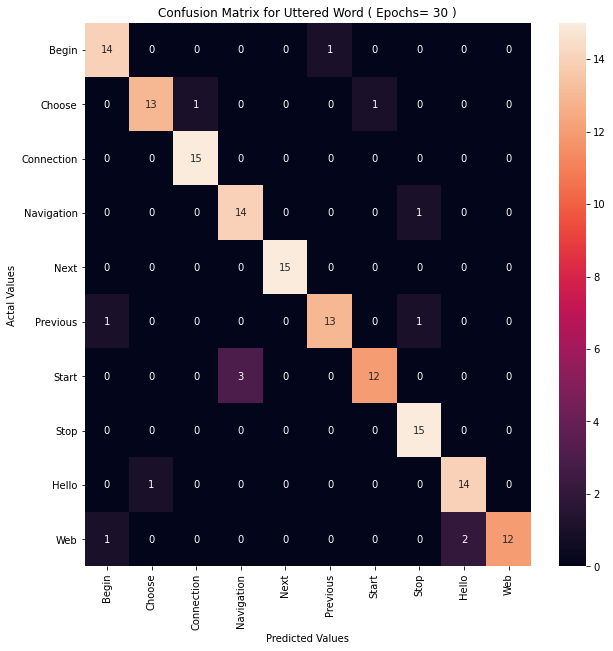

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix=confusion_matrix(actual_words_le, predicted_words_le)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(conf_matrix,
                     index = words, 
                     columns = words)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix for Uttered Word ( Epochs= 30 )')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
#Model Saving
# %pwd

# model.save_weights('saved_model/')

#model.save('complete_saved_model_15e')

INFO:tensorflow:Assets written to: complete_saved_model_10e\assets


INFO:tensorflow:Assets written to: complete_saved_model_10e\assets
